In [49]:
import polars as pl
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [3]:
path_to_data = r"../data/raw/ontime"

In [4]:
# This function reduces the memory usage of a DataFrame by downcasting numeric types
def downcast(df, verbose = True):
    start_memory = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == "object":
            pass
        elif dtype_name == "bool":
            df[col] = df[col].astype("int8")
        elif dtype_name.startswith("int") or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast = "integer")
        else:
            df[col] = pd.to_numeric(df[col], downcast = "float")
    end_memory = df.memory_usage().sum() / 1024 ** 2

    if verbose:
        print("{:.1f}% compressed".format(100 * (start_memory - end_memory) / start_memory))

    return df

In [17]:
df = pd.read_csv(f'{path_to_data}/_2018_1/_2018_1.csv', low_memory=False)


In [18]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2018,1,1,14,7,2018-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2018,1,1,15,1,2018-01-15,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2018,1,1,16,2,2018-01-16,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2018,1,1,17,3,2018-01-17,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2018,1,1,18,4,2018-01-18,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621393,2018,1,1,23,2,2018-01-23,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
621394,2018,1,1,24,3,2018-01-24,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
621395,2018,1,1,25,4,2018-01-25,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
621396,2018,1,1,26,5,2018-01-26,AA,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [19]:
list(df.columns)

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline ',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 '

In [20]:
df = df[[
 'FlightDate',
 'Marketing_Airline_Network',
 'DOT_ID_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginCityMarketID',
 'OriginState',
 'DestAirportID',
 'DestCityMarketID',
 'DestState',
 'DepTime',
 'DepDelay',
 'WheelsOff',
 'WheelsOn',
 'ArrTime',
 'ArrDelay',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'ActualElapsedTime',
 'Flights',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'Duplicate']]

In [21]:
df = downcast(df, verbose = True)

48.1% compressed


In [22]:
df

,FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,...,Diverted,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Duplicate
0,2018-01-14,UA,19977,4443,NaN,NaN,20366,N14902,4443,11618,...,0,151.0,1,628,NaN,NaN,NaN,NaN,NaN,N
1,2018-01-15,UA,19977,4443,NaN,NaN,20366,N12167,4443,11618,...,0,141.0,1,628,41.0,0.0,0.0,0.0,0.0,N
2,2018-01-16,UA,19977,4443,NaN,NaN,20366,N11109,4443,11618,...,0,131.0,1,628,67.0,0.0,0.0,0.0,2.0,N
3,2018-01-17,UA,19977,4443,NaN,NaN,20366,N16546,4443,11618,...,0,138.0,1,628,NaN,NaN,NaN,NaN,NaN,N
4,2018-01-18,UA,19977,4443,NaN,NaN,20366,N11165,4443,11618,...,0,134.0,1,628,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621393,2018-01-23,AA,19805,407,NaN,NaN,19805,N170US,407,14100,...,0,191.0,1,1013,NaN,NaN,NaN,NaN,NaN,N
621394,2018-01-24,AA,19805,407,NaN,NaN,19805,N979UY,407,14100,...,0,179.0,1,1013,NaN,NaN,NaN,NaN,NaN,N
621395,2018-01-25,AA,19805,407,NaN,NaN,19805,N182UW,407,14100,...,0,173.0,1,1013,NaN,NaN,NaN,NaN,NaN,N
621396,2018-01-26,AA,19805,407,NaN,NaN,19805,N580UW,407,14100,...,0,155.0,1,1013,NaN,NaN,NaN,NaN,NaN,N


In [24]:
# Get the list of all csv files in path_to_data and all subfolders
csv_files = []
for root, dirs, files in os.walk(path_to_data):
    for f in files:
        if f.endswith('.csv'):
            csv_files.append(os.path.join(root, f))
csv_files

['../data/raw/ontime\\_2018_1\\_2018_1.csv',
 '../data/raw/ontime\\_2018_10\\_2018_10.csv',
 '../data/raw/ontime\\_2018_11\\_2018_11.csv',
 '../data/raw/ontime\\_2018_12\\_2018_12.csv',
 '../data/raw/ontime\\_2018_2\\_2018_2.csv',
 '../data/raw/ontime\\_2018_3\\_2018_3.csv',
 '../data/raw/ontime\\_2018_4\\_2018_4.csv',
 '../data/raw/ontime\\_2018_5\\_2018_5.csv',
 '../data/raw/ontime\\_2018_6\\_2018_6.csv',
 '../data/raw/ontime\\_2018_7\\_2018_7.csv',
 '../data/raw/ontime\\_2018_8\\_2018_8.csv',
 '../data/raw/ontime\\_2018_9\\_2018_9.csv',
 '../data/raw/ontime\\_2019_1\\_2019_1.csv',
 '../data/raw/ontime\\_2019_10\\_2019_10.csv',
 '../data/raw/ontime\\_2019_11\\_2019_11.csv',
 '../data/raw/ontime\\_2019_12\\_2019_12.csv',
 '../data/raw/ontime\\_2019_2\\_2019_2.csv',
 '../data/raw/ontime\\_2019_3\\_2019_3.csv',
 '../data/raw/ontime\\_2019_4\\_2019_4.csv',
 '../data/raw/ontime\\_2019_5\\_2019_5.csv',
 '../data/raw/ontime\\_2019_6\\_2019_6.csv',
 '../data/raw/ontime\\_2019_7\\_2019_7.csv'

In [ ]:
def load_data(file):
    df = pd.read_csv(file, low_memory=False, encoding='latin-1')
    df = df[[
     'FlightDate',
     'Marketing_Airline_Network',
     'DOT_ID_Marketing_Airline',
     'Flight_Number_Marketing_Airline',
     'DOT_ID_Originally_Scheduled_Code_Share_Airline',
     'Flight_Num_Originally_Scheduled_Code_Share_Airline',
     'DOT_ID_Operating_Airline',
     'Tail_Number',
     'Flight_Number_Operating_Airline',
     'OriginAirportID',
     'OriginCityMarketID',
     'OriginState',
     'DestAirportID',
     'DestCityMarketID',
     'DestState',
     'DepTime',
     'DepDelay',
     'WheelsOff',
     'WheelsOn',
     'ArrTime',
     'ArrDelay',
     'Cancelled',
     'CancellationCode',
     'Diverted',
     'ActualElapsedTime',
     'Flights',
     'Distance',
     'CarrierDelay',
     'WeatherDelay',
     'NASDelay',
     'SecurityDelay',
     'LateAircraftDelay']]
    df['source_file'] = file
    return df

In [ ]:
# Loop through the files, limiting columns and appending to a df
for file in csv_files:
    if file == csv_files[0]:
        df_main = load_data(file)
    else:
        print(f"Loading {file}")
        df_temp = load_data(file)
        df_main = pd.concat([df_main, df_temp], ignore_index=True)

df_main = downcast(df_main, verbose = True)
df_main

Loading ../data/raw/ontime\_2018_10\_2018_10.csv
Loading ../data/raw/ontime\_2018_11\_2018_11.csv
Loading ../data/raw/ontime\_2018_12\_2018_12.csv
Loading ../data/raw/ontime\_2018_2\_2018_2.csv
Loading ../data/raw/ontime\_2018_3\_2018_3.csv
Loading ../data/raw/ontime\_2018_4\_2018_4.csv
Loading ../data/raw/ontime\_2018_5\_2018_5.csv
Loading ../data/raw/ontime\_2018_6\_2018_6.csv
Loading ../data/raw/ontime\_2018_7\_2018_7.csv
Loading ../data/raw/ontime\_2018_8\_2018_8.csv
Loading ../data/raw/ontime\_2018_9\_2018_9.csv
Loading ../data/raw/ontime\_2019_1\_2019_1.csv
Loading ../data/raw/ontime\_2019_10\_2019_10.csv
Loading ../data/raw/ontime\_2019_11\_2019_11.csv
Loading ../data/raw/ontime\_2019_12\_2019_12.csv
Loading ../data/raw/ontime\_2019_2\_2019_2.csv
Loading ../data/raw/ontime\_2019_3\_2019_3.csv
Loading ../data/raw/ontime\_2019_4\_2019_4.csv
Loading ../data/raw/ontime\_2019_5\_2019_5.csv
Loading ../data/raw/ontime\_2019_6\_2019_6.csv
Loading ../data/raw/ontime\_2019_7\_2019_7.csv
L

,FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,...,CancellationCode,Diverted,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018-01-14,UA,19977.0,4443.0,NaN,NaN,20366,N14902,4443.0,11618,...,NaN,0,151.0,1,628,NaN,NaN,NaN,NaN,NaN
1,2018-01-15,UA,19977.0,4443.0,NaN,NaN,20366,N12167,4443.0,11618,...,NaN,0,141.0,1,628,41.0,0.0,0.0,0.0,0.0
2,2018-01-16,UA,19977.0,4443.0,NaN,NaN,20366,N11109,4443.0,11618,...,NaN,0,131.0,1,628,67.0,0.0,0.0,0.0,2.0
3,2018-01-17,UA,19977.0,4443.0,NaN,NaN,20366,N16546,4443.0,11618,...,NaN,0,138.0,1,628,NaN,NaN,NaN,NaN,NaN
4,2018-01-18,UA,19977.0,4443.0,NaN,NaN,20366,N11165,4443.0,11618,...,NaN,0,134.0,1,628,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49712872,2025-01-08,AA,19805.0,5034.0,NaN,NaN,20397,N601EN,5034.0,10874,...,NaN,0,101.0,1,394,NaN,NaN,NaN,NaN,NaN
49712873,2025-01-09,AA,19805.0,5034.0,NaN,NaN,20397,N558NN,5034.0,10874,...,NaN,0,89.0,1,394,NaN,NaN,NaN,NaN,NaN
49712874,2025-01-10,AA,19805.0,5034.0,NaN,NaN,20397,N597NN,5034.0,10874,...,B,0,NaN,1,394,NaN,NaN,NaN,NaN,NaN
49712875,2025-01-11,AA,19805.0,5034.0,NaN,NaN,20397,N608NN,5034.0,10874,...,NaN,0,133.0,1,394,3.0,0.0,24.0,0.0,15.0


In [34]:
df_main.to_csv(f'{path_to_data}/combined.csv', index=False)

In [4]:
df_main = pd.read_csv(f'{path_to_data}/combined.csv')

In [22]:
df_main = pl.read_csv(f'{path_to_data}/combined.csv', try_parse_dates=True)

In [23]:
df_main

FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginCityMarketID,OriginState,DestAirportID,DestCityMarketID,DestState,DepTime,DepDelay,WheelsOff,WheelsOn,ArrTime,ArrDelay,Cancelled,CancellationCode,Diverted,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
date,str,f64,f64,str,str,i64,str,f64,i64,i64,str,i64,i64,str,f64,f64,f64,f64,f64,f64,i64,str,i64,f64,i64,i64,f64,f64,f64,f64,f64
2018-01-14,"""UA""",19977.0,4443.0,null,null,20366,"""N14902""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1832.0,-3.0,1904.0,2056.0,2103.0,5.0,0,null,0,151.0,1,628,null,null,null,null,null
2018-01-15,"""UA""",19977.0,4443.0,null,null,20366,"""N12167""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1928.0,43.0,2003.0,2145.0,2149.0,41.0,0,null,0,141.0,1,628,41.0,0.0,0.0,0.0,0.0
2018-01-16,"""UA""",19977.0,4443.0,null,null,20366,"""N11109""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1956.0,81.0,2014.0,2202.0,2207.0,69.0,0,null,0,131.0,1,628,67.0,0.0,0.0,0.0,2.0
2018-01-17,"""UA""",19977.0,4443.0,null,null,20366,"""N16546""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1836.0,1.0,1855.0,2048.0,2054.0,-4.0,0,null,0,138.0,1,628,null,null,null,null,null
2018-01-18,"""UA""",19977.0,4443.0,null,null,20366,"""N11165""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1844.0,-1.0,1920.0,2052.0,2058.0,-10.0,0,null,0,134.0,1,628,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-01-08,"""AA""",19805.0,5034.0,null,null,20397,"""N601EN""",5034.0,10874,30647,"""OH""",11057,31057,"""NC""",1103.0,-12.0,1133.0,1234.0,1244.0,-20.0,0,null,0,101.0,1,394,null,null,null,null,null
2025-01-09,"""AA""",19805.0,5034.0,null,null,20397,"""N558NN""",5034.0,10874,30647,"""OH""",11057,31057,"""NC""",1107.0,-8.0,1123.0,1223.0,1236.0,-28.0,0,null,0,89.0,1,394,null,null,null,null,null
2025-01-10,"""AA""",19805.0,5034.0,null,null,20397,"""N597NN""",5034.0,10874,30647,"""OH""",11057,31057,"""NC""",null,null,null,null,null,null,1,"""B""",0,null,1,394,null,null,null,null,null


In [24]:
df_main[:1000].write_csv(f'{path_to_data}/ontime_1000.csv')

In [25]:
df_main.columns

['FlightDate',
 'Marketing_Airline_Network',
 'DOT_ID_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginCityMarketID',
 'OriginState',
 'DestAirportID',
 'DestCityMarketID',
 'DestState',
 'DepTime',
 'DepDelay',
 'WheelsOff',
 'WheelsOn',
 'ArrTime',
 'ArrDelay',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'ActualElapsedTime',
 'Flights',
 'Distance',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [26]:
# Aggregate by 'FlightDate', 'Marketing_Airline_Network', 'OriginAirportID', 'DestAirportID'
df_agg = df_main.group_by(
    ['FlightDate', 'Marketing_Airline_Network', 'OriginAirportID', 'DestAirportID']
    ).agg(
    pl.col("FlightDate").count().alias('count_flights'),
    pl.col("DepDelay").mean().alias('avg_DepDelay'),
    pl.col("ArrDelay").mean().alias('avg_ArrDelay'),
    pl.col("Cancelled").sum().alias('count_Cancelled'),
    pl.col("Distance").mean().alias('avg_Distance'),
    pl.col("ActualElapsedTime").mean().alias('avg_time')
    )
df_agg

FlightDate,Marketing_Airline_Network,OriginAirportID,DestAirportID,count_flights,avg_DepDelay,avg_ArrDelay,count_Cancelled,avg_Distance,avg_time
date,str,i64,i64,u32,f64,f64,i64,f64,f64
2021-07-31,"""DL""",13487,10620,2,-5.0,-14.5,0,748.0,123.0
2023-10-15,"""AS""",14057,11638,1,-8.0,-1.0,0,626.0,113.0
2024-08-30,"""WN""",13232,10140,2,17.0,27.5,0,1121.0,185.5
2018-02-19,"""UA""",15016,11618,5,43.6,33.6,0,872.0,142.6
2018-11-05,"""DL""",13931,12478,3,-3.666667,-17.666667,0,290.0,81.666667
…,…,…,…,…,…,…,…,…,…
2020-05-07,"""AA""",13487,11298,3,-7.0,-23.333333,0,852.0,141.666667
2019-10-29,"""DL""",12339,12892,1,-4.0,3.0,0,1814.0,285.0
2022-04-23,"""WN""",13204,11259,6,8.833333,-8.166667,0,973.0,152.166667


In [92]:
# Aggregate by 'FlightDate', 'Marketing_Airline_Network'
df_agg_airday = df_main.group_by(
    ['FlightDate', 'Marketing_Airline_Network']
    ).agg(
    pl.col("FlightDate").count().alias('count_flights'),
    pl.col("DepDelay").mean().alias('avg_DepDelay'),
    pl.col("ArrDelay").mean().alias('avg_ArrDelay'),
    pl.col("Cancelled").sum().alias('count_Cancelled'),
    pl.col("Distance").mean().alias('avg_Distance'),
    pl.col("ActualElapsedTime").mean().alias('avg_time')
    ).sort(by=['FlightDate', 'Marketing_Airline_Network'])

df_agg_airday=df_agg_airday.with_columns(
    count_flights_ma = pl.col("count_flights").rolling_mean(window_size=30).over("Marketing_Airline_Network")
)
    
df_agg_airday

FlightDate,Marketing_Airline_Network,count_flights,avg_DepDelay,avg_ArrDelay,count_Cancelled,avg_Distance,avg_time,count_flights_ma
date,str,u32,f64,f64,i64,f64,f64,f64
2018-01-01,"""AA""",5368,25.520179,19.906615,224,731.545455,132.719844,null
2018-01-01,"""AS""",894,6.476836,0.028637,10,935.439597,153.017182,null
2018-01-01,"""B6""",854,30.030445,28.502342,0,1079.782201,176.045667,null
2018-01-01,"""DL""",3212,13.628153,3.394261,1,778.321606,136.703057,null
2018-01-01,"""F9""",304,35.617747,28.742268,12,1051.615132,169.233677,null
…,…,…,…,…,…,…,…,…
2025-01-31,"""G4""",386,-0.365285,-10.194805,0,925.42487,148.361039,302.9
2025-01-31,"""HA""",227,101.866995,111.152709,24,883.017621,136.1133,216.633333
2025-01-31,"""NK""",632,0.684628,-7.090476,1,948.503165,154.549206,565.1


In [ ]:
df_counts = df_agg_airday.select(
    ['FlightDate', 'Marketing_Airline_Network', 'count_flights_ma']
).filter(
    pl.col('FlightDate').is_between(
        datetime(2023, 1, 1), datetime(2025, 1, 1)
    )
)

# Reshape wide by airline
df_counts_wide = df_counts.pivot(
    index='FlightDate',
    columns='Marketing_Airline_Network',
    values='count_flights_ma'
).fill_null(0).sort('FlightDate')

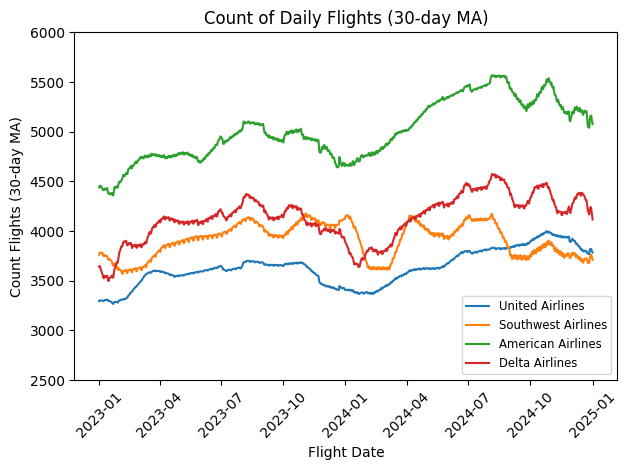

In [ ]:
plt.plot(df_counts_wide['FlightDate'], df_counts_wide['UA'], label='United Airlines', marker='', linestyle='-')
plt.plot(df_counts_wide['FlightDate'], df_counts_wide['WN'], label='Southwest Airlines', marker='', linestyle='-')
plt.plot(df_counts_wide['FlightDate'], df_counts_wide['AA'], label='American Airlines', marker='', linestyle='-')
plt.plot(df_counts_wide['FlightDate'], df_counts_wide['DL'], label='Delta Airlines', marker='', linestyle='-')
plt.xlabel('Flight Date')
plt.ylabel('Count Flights (30-day MA)')
plt.ylim([2500, 6000])
plt.title('Count of Daily Flights (30-day MA)')
plt.legend(loc='lower right', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()

In [107]:
df_changes = df_agg_airday.sort(['FlightDate', 'Marketing_Airline_Network']
).with_columns(
    weekly_change=pl.col('count_flights').diff(n=7).over('Marketing_Airline_Network')
).select(
    ['FlightDate', 'Marketing_Airline_Network', 'weekly_change']
).filter(
    pl.col('FlightDate').is_between(
        datetime(2023, 1, 1), datetime(2023, 3, 1)
    )
)

# Reshape wide by airline
df_changes_wide = df_changes.pivot(
    index='FlightDate',
    columns='Marketing_Airline_Network',
    values='weekly_change'
).fill_null(0).sort('FlightDate')

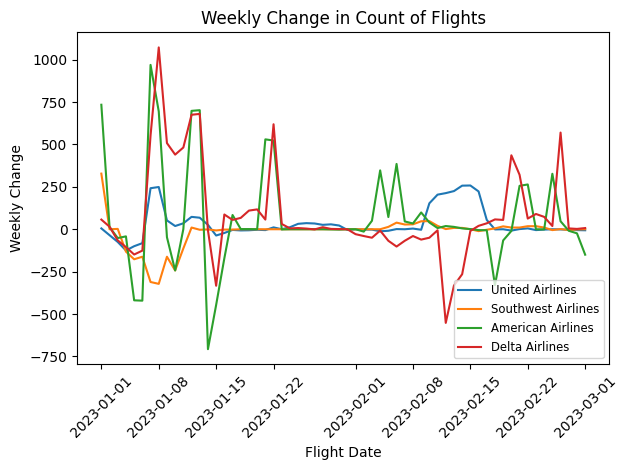

In [108]:
plt.plot(df_changes_wide['FlightDate'], df_changes_wide['UA'], label='United Airlines', marker='', linestyle='-')
plt.plot(df_changes_wide['FlightDate'], df_changes_wide['WN'], label='Southwest Airlines', marker='', linestyle='-')
plt.plot(df_changes_wide['FlightDate'], df_changes_wide['AA'], label='American Airlines', marker='', linestyle='-')
plt.plot(df_changes_wide['FlightDate'], df_changes_wide['DL'], label='Delta Airlines', marker='', linestyle='-')
plt.xlabel('Flight Date')
plt.title('Weekly Change in Count of Flights')
#plt.ylim([2500, 6000])
plt.ylabel('Weekly Change')
plt.legend(loc='lower right', fontsize='small')
plt.xticks(rotation=45)
plt.tight_layout()

In [27]:
df_agg['Marketing_Airline_Network'].value_counts(sort=True)

Marketing_Airline_Network,count
str,u32
"""AA""",3882104
"""WN""",3326324
"""DL""",3170811
"""UA""",3123239
"""AS""",1122223
…,…
"""B6""",794717
"""G4""",738031
"""HA""",163601


In [28]:
#Add a year/month variable.
df_main = df_main.with_columns(
    pl.col("FlightDate").dt.round("1mo").alias("ym")
)
df_main

FlightDate,Marketing_Airline_Network,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginCityMarketID,OriginState,DestAirportID,DestCityMarketID,DestState,DepTime,DepDelay,WheelsOff,WheelsOn,ArrTime,ArrDelay,Cancelled,CancellationCode,Diverted,ActualElapsedTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ym
date,str,f64,f64,str,str,i64,str,f64,i64,i64,str,i64,i64,str,f64,f64,f64,f64,f64,f64,i64,str,i64,f64,i64,i64,f64,f64,f64,f64,f64,date
2018-01-14,"""UA""",19977.0,4443.0,null,null,20366,"""N14902""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1832.0,-3.0,1904.0,2056.0,2103.0,5.0,0,null,0,151.0,1,628,null,null,null,null,null,2018-01-01
2018-01-15,"""UA""",19977.0,4443.0,null,null,20366,"""N12167""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1928.0,43.0,2003.0,2145.0,2149.0,41.0,0,null,0,141.0,1,628,41.0,0.0,0.0,0.0,0.0,2018-01-01
2018-01-16,"""UA""",19977.0,4443.0,null,null,20366,"""N11109""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1956.0,81.0,2014.0,2202.0,2207.0,69.0,0,null,0,131.0,1,628,67.0,0.0,0.0,0.0,2.0,2018-01-01
2018-01-17,"""UA""",19977.0,4443.0,null,null,20366,"""N16546""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1836.0,1.0,1855.0,2048.0,2054.0,-4.0,0,null,0,138.0,1,628,null,null,null,null,null,2018-01-01
2018-01-18,"""UA""",19977.0,4443.0,null,null,20366,"""N11165""",4443.0,11618,31703,"""NJ""",10994,30994,"""SC""",1844.0,-1.0,1920.0,2052.0,2058.0,-10.0,0,null,0,134.0,1,628,null,null,null,null,null,2018-02-01
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-01-08,"""AA""",19805.0,5034.0,null,null,20397,"""N601EN""",5034.0,10874,30647,"""OH""",11057,31057,"""NC""",1103.0,-12.0,1133.0,1234.0,1244.0,-20.0,0,null,0,101.0,1,394,null,null,null,null,null,2025-01-01
2025-01-09,"""AA""",19805.0,5034.0,null,null,20397,"""N558NN""",5034.0,10874,30647,"""OH""",11057,31057,"""NC""",1107.0,-8.0,1123.0,1223.0,1236.0,-28.0,0,null,0,89.0,1,394,null,null,null,null,null,2025-01-01
2025-01-10,"""AA""",19805.0,5034.0,null,null,20397,"""N597NN""",5034.0,10874,30647,"""OH""",11057,31057,"""NC""",null,null,null,null,null,null,1,"""B""",0,null,1,394,null,null,null,null,null,2025-01-01


In [29]:
# Aggregate by 'FlightDate', 'Marketing_Airline_Network', 'OriginAirportID', 'DestAirportID'
df_agg2 = df_main.group_by(['ym', 'Marketing_Airline_Network', 'OriginAirportID', 'OriginState']
    ).agg(
    pl.col("FlightDate").count().alias("count_flights"),
    pl.col("DepDelay").mean().alias("avg_DepDelay"),
    pl.col("ArrDelay").mean().alias("avg_ArrDelay"),
    pl.col("Cancelled").sum().alias("count_Cancelled"),
    pl.col("Distance").mean().alias("avg_Distance"),
    pl.col("ActualElapsedTime").mean().alias("avg_time")
)
df_agg2

ym,Marketing_Airline_Network,OriginAirportID,OriginState,count_flights,avg_DepDelay,avg_ArrDelay,count_Cancelled,avg_Distance,avg_time
date,str,i64,str,u32,f64,f64,i64,f64,f64
2022-11-01,"""WN""",12982,"""HI""",300,3.250836,2.461538,1,855.4,125.381271
2019-12-01,"""AS""",12094,"""CO""",4,74.333333,53.333333,1,830.0,157.0
2024-11-01,"""G4""",10423,"""TX""",53,17.867925,16.679245,0,959.075472,142.641509
2024-12-01,"""B6""",12197,"""NY""",459,7.010893,2.505447,0,1088.72549,177.849673
2020-04-01,"""AA""",14747,"""WA""",493,0.16568,-14.715976,155,1633.782961,225.263314
…,…,…,…,…,…,…,…,…,…
2018-10-01,"""UA""",11921,"""CO""",140,5.589928,4.410072,1,212.0,65.223022
2018-04-01,"""B6""",12954,"""CA""",1051,15.011494,11.879079,7,690.350143,114.784069
2022-12-01,"""DL""",12278,"""KS""",110,1.376147,-9.908257,1,730.290909,113.633028


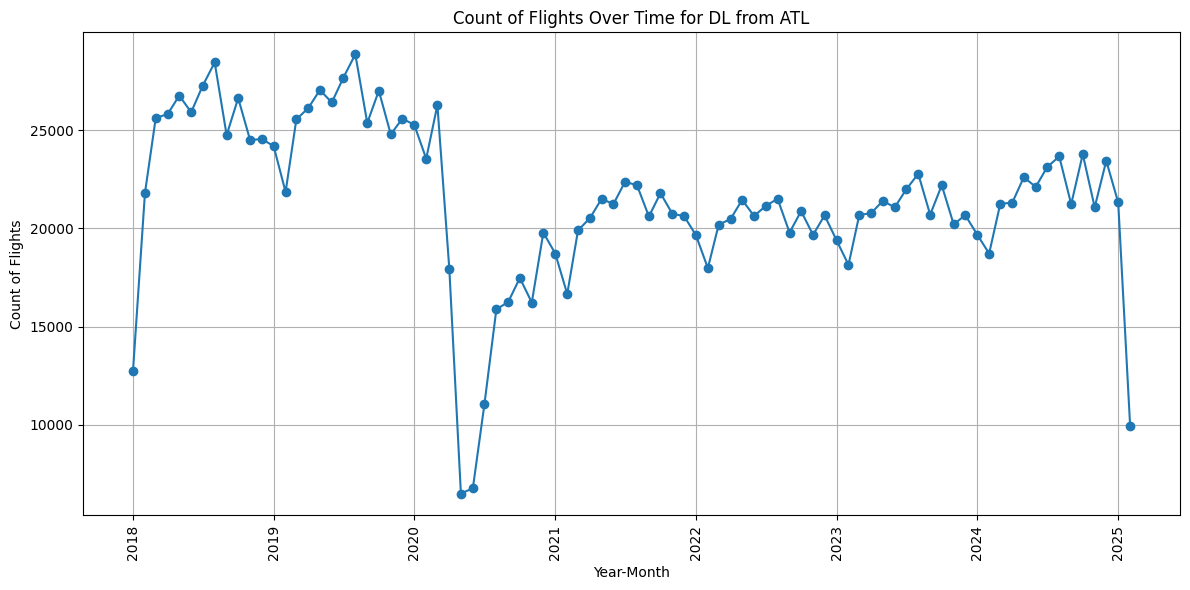

In [ ]:
# Line plot of count_flights over time for Marketing_Airline_Network=="DL" and OriginAirportID==10397
df_plot = df_agg2.filter((pl.col('Marketing_Airline_Network') == 'DL') & (pl.col('OriginAirportID') == 10397)).sort('ym')

plt.figure(figsize=(12, 6))
plt.plot(df_plot['ym'], df_plot['count_flights'], marker='o')
plt.title('Count of Flights Over Time for DL from ATL')
plt.xlabel('Year-Month')
plt.ylabel('Count of Flights')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()